In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import scipy.linalg as la

import quantecon as qe

In [71]:
# Set parameters
mu_d = 13.0
rho = 0.05
gan = 8.0
c_d = 1.0
beta = 0.95
R = 1 / beta
# y=[1 d k]のやつ

sig=-1e-9
theta_LQ = -1/sig

R = 1 / beta
A = np.array([[1.0, 0.0], [(1.0 - rho) * mu_d, rho]])
C = np.array([[0.0], [c_d]])

# ここでは使わない
G = np.array([[0.0, 1.0]])
G_1 = np.array([[1.0, 0.0]])

In [72]:
A12 = np.zeros((2, 1))
ALQ_l = np.hstack([A, A12])
ALQ_r = np.array([[-gan, 1.0, R]])
ALQ = np.vstack([ALQ_l, ALQ_r])


In [73]:
ep = 1e-9
RLQ = np.array(
    [
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, ep],
    ]
)


In [74]:
QLQ = np.array([1.0])
BLQ = np.array([0.0, 0.0, -1.0]).reshape(3, 1)
CLQ = np.array([0.0, c_d, 0.0]).reshape(3, 1)
beta_LQ = beta

In [75]:
rblq = qe.RBLQ(QLQ, RLQ, ALQ, BLQ, C=CLQ,beta=beta_LQ,theta=theta_LQ)

In [76]:
F, P, K = rblq.robust_rule()  # Compute value function and decision rule

In [77]:
print(f"F = \n {-F}")


F = 
 [[4.31758507 0.05249346 0.0526316 ]]


In [78]:
ABF = ALQ - BLQ @ F  #  Form closed loop system

In [79]:
iter_t = 150
d_0 = 0.0

np.random.seed(5)
eps = np.random.randn(iter_t)
y = np.array([[1.0, 0.0, 0.0]])
# print(y[0])
# print(y.shape)
for i in range(iter_t):
    # print(i)
    # F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, sig)
    # Tmp = A -np.dot(B,F) + np.dot(C,K)
    # print(f"y = \n{np.dot(Tmp, y[0].T) + CLQ.T * eps[i]}")
    # print(y)
    # print(y.shape)
    y = np.insert(y, 0, np.dot(ABF, y[0].T) + CLQ.T * eps[i], axis=0)
    if i ==0:
        y[0][2]=0

In [80]:
y = y[::-1]
# print(y)
k_get = y[:, 2]
d_get = y[:, 1]

one_get = y[:, 0]
x = np.array(range(iter_t + 1))

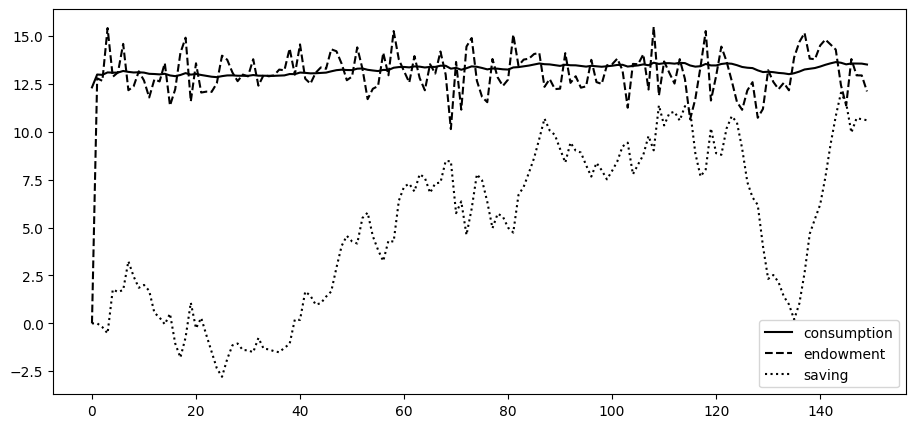

In [81]:
c = np.zeros(iter_t + 1)
# print("c size before %d"%c.shape)
c[0] = 0
where = 0
for i in range(iter_t):
    # print("k = %d"%k_get[(iter_t + 1) * where + i - 1])
    # print(i)
    # print(y[i])
    c[i] = -F @ y[i] + gan
    # print("c = %d"%c[i])

# print(c.shape)
#plt.ylim((-50,50))
plt.plot(
    np.array(range(iter_t)),
    c[:iter_t],
    linestyle="-",
    label="consumption",
    color="black",
)
plt.plot(
    np.array(range(iter_t)),
    d_get[:iter_t],
    linestyle="--",
    label="endowment",
    color="black",
)
plt.plot(
    np.array(range(iter_t)),
    k_get[:iter_t],
    linestyle=":",
    label="saving",
    color="black",
)
# plt.axhline(y=gan, xmin=0.0, xmax=iter_t, color="r")
plt.legend()
plt.show()